In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install underthesea

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 63.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.9 MB/s eta 0:00:00:00:01


In [45]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
from underthesea import word_tokenize
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [29]:
data = pd.read_csv('/kaggle/input/vietnamese-text-classification-dataset/train.csv', header=None, names=['target', 'content'])

In [24]:
data

,target,content
0,0,máy dùng hay bị đơ máy
1,0,chỉ có dây cáp nguồn không có adapter sao sử d...
2,0,Chất lượng quá kém Mới dùng được 2 ngày loa ba...
3,0,Usb tôi vừa mới nhận usb này Rất bực bội vì cá...
4,2,Tuyệt vời. Hàng FPT cửa hàng
...,...,...
3035,0,không có bộ thu đi kèm Vừa nhận hàng xong tức ...
3036,0,Cũng bình thường Không mạnh như kỹ vọng Chắc t...
3037,2,tốt tốt đang tiền khi bỏ ra để mua giao hàng n...
3038,0,giao hàng lâu rửa tay một tí đã cháy màn hình ...


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   3040 non-null   int64 
 1   content  3040 non-null   object
dtypes: int64(1), object(1)
memory usage: 47.6+ KB


<Axes: xlabel='target', ylabel='count'>

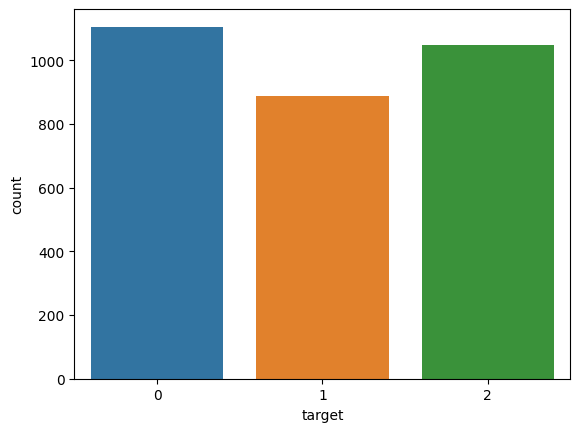

In [15]:
sns.countplot(data, x='target')

In [30]:
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'[^\w\s]', ' ', text)
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # Emoticons
        u"\U0001F300-\U0001F5FF"  # Symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # Transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # Flags
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251"  # Enclosed characters
        "]+", flags=re.UNICODE
    )
    text = emoji_pattern.sub('', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()
data['content'] = data['content'].apply(clean_text)

In [34]:
data['content'][:5]

0                               máy dùng hay bị đơ máy
1    chỉ có dây cáp nguồn không có adapter sao sử d...
2    chất lượng quá kém mới dùng được 2 ngày loa ba...
3    usb tôi vừa mới nhận usb này rất bực bội vì cá...
4                          tuyệt vời hàng fpt cửa hàng
Name: content, dtype: object

In [41]:
X_train, X_test, y_train, y_test = train_test_split(data['content'], data['target'], test_size=0.2, random_state=42)

In [42]:
vectorizer = TfidfVectorizer(max_features=5000)  
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [44]:
X_train_vec.shape

(2432, 3126)

# Naive Bayes

In [46]:
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
print("Naive Bayes:")
print(classification_report(y_test, nb.predict(X_test_vec)))

Naive Bayes:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       241
           1       0.74      0.54      0.63       175
           2       0.77      0.92      0.83       192

    accuracy                           0.78       608
   macro avg       0.77      0.77      0.76       608
weighted avg       0.78      0.78      0.77       608



# Support Vector Machine

In [49]:
svc = LinearSVC(multi_class="ovr")
svc.fit(X_train_vec, y_train)
print("Linear SVM:")
print(classification_report(y_test, svc.predict(X_test_vec)))

Linear SVM:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       241
           1       0.72      0.71      0.72       175
           2       0.86      0.84      0.85       192

    accuracy                           0.81       608
   macro avg       0.81      0.81      0.81       608
weighted avg       0.81      0.81      0.81       608

